In [84]:
"""Importar las librerías"""
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.mode14 columl_selection import train_test_split
from sklearn import metrics

"""Librerias para la matriz de confusión"""
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

#### Carga del Dataset

In [85]:
"""Cargar el Dataset"""

df = pd.read_csv("Dataset_of_Diabetes.csv")

"""Mostrar el Dataset"""
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


## Descripción del Dataset

Construimos un clasificador basado en aprendizaje automático que predice si un paciente es diabético o no, en función de la información proporcionada en la base de datos. Se tomaron los archivos de los pacientes y se extrajeron los datos de ellos y se ingresaron en la base de datos para construir el conjunto de datos de diabetes. Los datos consisten en información médica, análisis de laboratorio. Los atributos de datos son: Los datos consisten en información médica, análisis de laboratorio, etc. Los datos que se han ingresado inicialmente en el sistema son: No. de Paciente, Nivel de Azúcar en Sangre, Edad, Género, Índice de Creatinina (Cr), Masa Corporal índice (IMC), urea, colesterol (Chol), perfil de lípidos en ayunas, incluidos total, LDL, VLDL, triglicéridos (TG) y colesterol HDL, HBA1C, clase (del paciente)

### Mapeo de los datos

In [86]:
"""Mapeo de datos de string a binarios, a travez de la función .map()
    ->Gender (F=1, M=0)"""

df['Gender'] = df['Gender'].map({'F': 1, 'M': 0})
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,1.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,0.0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,1.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,1.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,0.0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [87]:
"""Cambiar los valores string por binarios
   ->CLASS (N=0, Y=1, P=2)"""

df['CLASS'] = df['CLASS'].map({'N': 0, 'Y': 1, 'P': 2})
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,1.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
1,735,34221,0.0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0.0
2,420,47975,1.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
3,680,87656,1.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
4,504,34223,0.0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0.0


### Definición de las Variables objetivos y la característica (feature)

In [88]:
"""determinar variables objetivo (dependientes) y características (independientes)"""

feature_cols = ['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL','BMI']

"""features"""
X = df[feature_cols] 

"""target"""
y = df.CLASS 

### Análisis de la caracteristica "CLASS"

El conjunto de datos de diabetes consta de 1000 puntos de datos, con 14 características cada uno:

In [89]:
print("dimension of diabetes data: {}".format(df.shape))

dimension of diabetes data: (1000, 14)


"Class" es la variable objetivo que vamos a predecir, 0 significa Sin diabetes, 1 significa Diabetes y 2 Probablemente (probability). De estos 1000 puntos de datos, 102 están etiquetados como "0", 840 como "1" y  53 como "2". Los otros 5 valores restantes son nulos.

In [90]:
print(df.groupby('CLASS').size())

CLASS
0.0    102
1.0    840
2.0     53
dtype: int64


### Valores Nulos

In [91]:
"""Verificación si el Dataset contiene valores nulos"""
df.isnull().head(10)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [92]:
"""Comprobar el número de valores nulos"""
df.isnull().sum()

ID           0
No_Pation    0
Gender       1
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        5
dtype: int64

In [93]:
"""Copia del dataset y reemplazo de los valores nulos por: NaN """
import numpy as np
df_copy = df.copy(deep = True)
df_copy[['Gender','CLASS']] = df_copy[['Gender','CLASS']].replace(0,np.NaN)

"""Mostrando el conteo de NaN"""
print(df_copy.isnull().sum())

ID             0
No_Pation      0
Gender       566
AGE            0
Urea           0
Cr             0
HbA1c          0
Chol           0
TG             0
HDL            0
LDL            0
VLDL           0
BMI            0
CLASS        107
dtype: int64


## División del Dataset

In [99]:
"""Dividir el conjunto de datos en proporción de conjunto de entrenamiento y prueba
    para este ejercicio se dividio en 70% para en entrenamiento y 30% para pruebas"""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Modelamiento Clasificador de árboles de decisión

In [100]:
"""Crear un objeto Decision Tree Classifier"""
clf = DecisionTreeClassifier()

"""Entrenar Decision Tree Classifier"""
clf = clf.fit(X_train,y_train)

In [141]:
"""Predicción de la respuesta para el conjunto de datos de prueba"""
y_pred = clf.predict(X_test)
print(y_pred)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 2. 1. 1. 1. 2. 2. 0. 1. 1. 1. 1. 1. 1.
 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 2. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 2. 1. 1.
 2. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 2. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 2.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]


Interpretación: El conjunto de datos se probó a través de dos herramientas de clasificación que son árbol de decisión. Este se importa de la biblioteca de aprendizaje de sci-kit. El conjunto de entrenamiento se ajustó al modelo y se obtuvieron puntajes para los conjuntos de entrenamiento y prueba.

## Matriz de confusión

In [178]:
"""Funsión que permite crear una matriz de confusión"""
df= confusion_matrix(y_test, y_pred)
print (" Matriz de Confusion:\n ", df)

 Matriz de Confusion:
  [[ 32   2   0]
 [  6 243   1]
 [  0   0  16]]


C:\Users\gulna\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


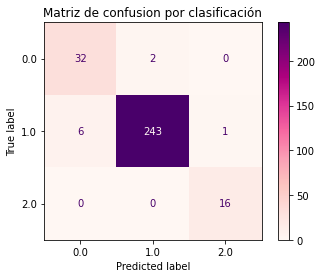

In [176]:
"""Visualización grafica de la Matriz de confusion"""
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.RdPu)  
plt.title ( "Matriz de confusion por clasificación")
plt.show()

Interpretación: Según la matriz de confusión 3x3, las columnas son las predicciones y, por lo tanto, las filas deben ser los valores reales. La diagonal principal (32, 243, 16) da las predicciones correctas. Es decir, los casos en los que los valores reales y las predicciones del modelo son los mismos.

La primera fila son los casos reales. El modelo predijo que 32 de estos predijeron correcta e incorrectamente que 2 de los pacientes eran posibles diabeticos y 0 habian sido detectados. Mirando la columna positivos, de los 840 pacientes predichos por el modelo (suma de la columna P), 32 eran en realidad diabeticos, mientras que 6 eran  mal predichas como hombres y 243 eran  incorrectamente predichos como posibles diabeticos.

### Métricas

In [158]:
"""Establecemos las métricas para interpretar los valores arrojados por el modelo"""
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precisión: ", metrics.precision_score(y_test, y_pred, average = 'macro'))
print("Recall: ", metrics.recall_score(y_test, y_pred, average = 'macro'))

Accuracy: 0.9466666666666667
Precisión:  0.9109019607843137
Recall:  0.9109019607843137


Interpretación: Para nuestro modelo, el puntaje de la curva de características operativas del área bajo el receptor (Accuracy) es del 94%. Esto implica que el modelo de clasificación es lo suficientemente bueno como para detectar al paciente diabético.

In [159]:
"""EVALUACIÓN UTILIZANDO INFORME DE CLASIFICACIÓN"""
from sklearn.metrics import classification_report 
print(classification_report(y_test ,y_pred)) 

              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76        34
         1.0       0.97      0.97      0.97       250
         2.0       1.00      1.00      1.00        16

    accuracy                           0.95       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
Interpretación: 

## Visualización del Árbol

We will plot the tree to see its root, branches, and nodes using the following functions:

* **StringIO()**: creates an object (empty in this case) to receive a string buffer (the tree will be created first as a string before as an image) in DOT (graph description language) format.
* **export_graphviz()**: this function exports the tree in DOT format, generating a representation of the decision tree, which is written into the ‘out_file’.
* **graph_from_dot_data()**: will use the DOT object to create the graph.
* **Image()**: uses raw data to return an image (png, jpeg, gif).

In [144]:
"""importar librerías para la visualización de árboles de decisión"""

from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

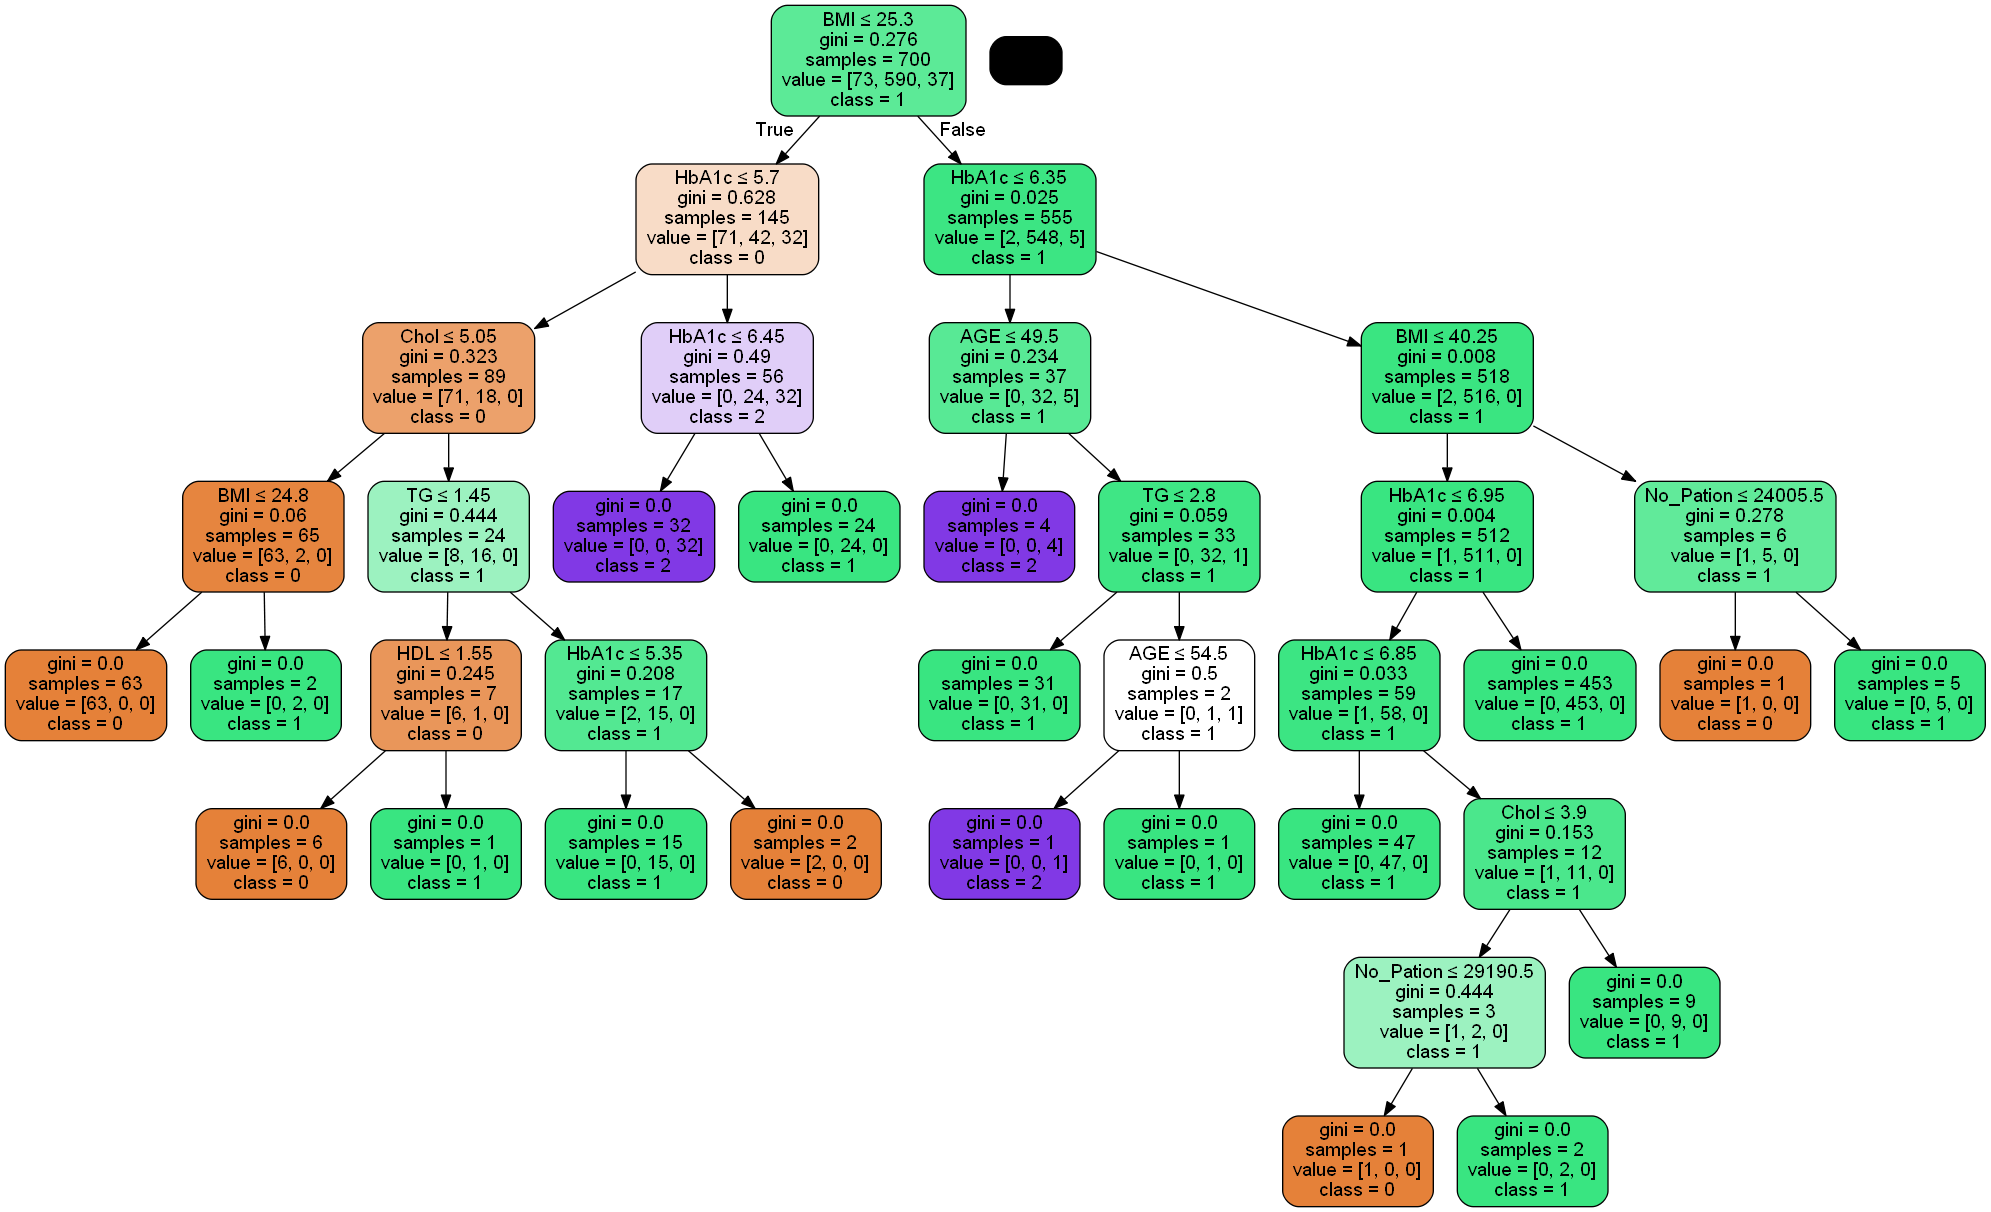

In [133]:
"""Visualización del árbol de decisión"""

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Pruning

The complete decision tree is difficult to interpret due to the complexity of the outcome. Pruning/shortening a tree is essential to ease our understanding of the outcome and optimize it. This optimization can be done in one of three ways:

* **criterion**: optional (default="gini") or Choose attribute selection measure

Defines what function will be used to measure the quality of a split. The options are "gini" and "entropy". The Gini ratio measures the impurity of the node in a decision tree. One can assume that a node is pure when all of its records belong to the same class.

* **splitter**: string, optional (default="best") or Split Strategy

Defines the strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.

* **max_depth**: int or None, optional (default=None) or Maximum Depth of a Tree

Defines the maximum depth of the tree. If it’s None, the tree will be as long as possible, when all the leaves are pure (risk of overfitting the model).

In [191]:
"""Crear un objeto Decision Tree Classifier"""
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

"""Entrenar Decision Tree Classifier"""
clf = clf.fit(X_train,y_train)



In [192]:
"""Predecir la respuesta para el conjunto de datos de prueba"""
y_pred = clf.predict(X_test)
print(y_pred)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 2. 1. 1. 1. 2. 2. 0. 1. 1. 1. 1. 1. 1.
 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 2. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 2. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 2. 1. 1.
 2. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 2. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 2. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 0. 0.
 1. 1. 1. 1. 1. 2. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 2.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]


## Métricas (Pruning)

In [193]:
"""Establecemos las métricas para interpretar los valores arrojados por el modelo"""
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precisión: ", metrics.precision_score(y_test, y_pred, average = 'macro'))
print("Recall: ", metrics.recall_score(y_test, y_pred, average = 'macro'))

Accuracy: 0.98
Precisión:  0.9491325562483057
Recall:  0.9750588235294119


Interpretación: La tasa de clasificación aumentó al 98 %, lo que representa una mayor precisión que el modelo anterior.

In [194]:
"""EVALUACIÓN UTILIZANDO INFORME DE CLASIFICACIÓN"""
from sklearn.metrics import classification_report 
print(classification_report(y_test ,y_pred)) 

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93        34
         1.0       0.99      0.98      0.99       250
         2.0       0.94      1.00      0.97        16

    accuracy                           0.98       300
   macro avg       0.95      0.98      0.96       300
weighted avg       0.98      0.98      0.98       300



## Pruning (Matriz de Confusión) 

In [197]:
"""Funsión que permite crear una matriz de confusión"""
df= confusion_matrix(y_test, y_pred)
print (" Matriz de Confusion:\n ", df)

 Matriz de Confusion:
  [[ 32   2   0]
 [  3 246   1]
 [  0   0  16]]


C:\Users\gulna\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


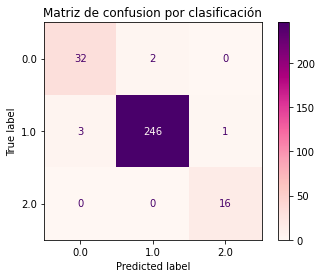

In [198]:
"""Visualización grafica de la Matriz de confusion"""
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.RdPu)  
plt.title ( "Matriz de confusion por clasificación")
plt.show()

Interpretación: Se puede observar que el modelo se desempeñó mejor con una puntuación del 97\% en comparación con la del 91\%.

## Visualización del Árbol

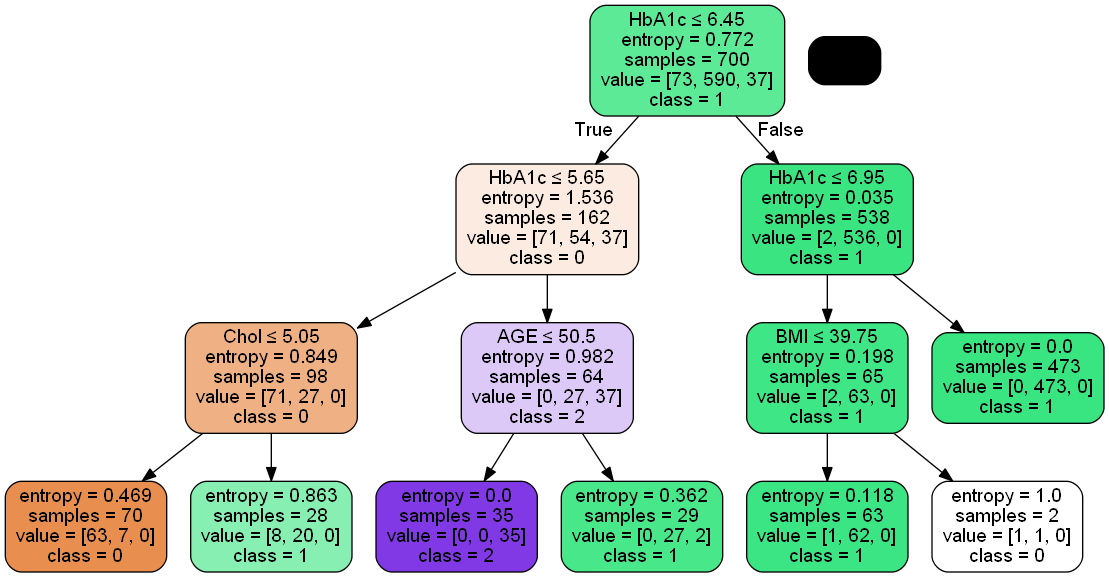

In [155]:
"""Visualizar árbol prepodado"""

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True, feature_names = feature_cols,class_names=['0','1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes2.png')
Image(graph.create_png())

Interpretación: Se puede observar que por medio del Pruning el modelo alcanzó un mejor desempeño, e incluso nuestro árbol es mucho más sencillo de comprender. Ya que, básicamente cuando se construye este tipo de modelo el objetivo es mostrar los resultados más óptiomos para la toma de decisiones. Por lo que podemos concluir que nuestro modelo resolvio la clasificación y predicción con mucha eficiendia.